# digits dataset 분류하기

## import modules

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## load dataset
    * feature exploaration
    * feature selection

In [3]:
digits = load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
digits.feature_names  # 8X8 그리드인 것을 알 수 있다

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [7]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

* 5620개의 data가 있다고 적혀 있지만, 실제로는 1797개의 데이터가 있다. 
* 각 data마다 64개의 feature(pixel)이 있는 것을 확인했다.
* 각 픽셀의 값은 0부터 16의 range에 있다. 이때 0과 16을 포함한다.
* label은 0부터 9까지의 숫자이다.
* 각 픽셀이 하나의 feature이므로, 모든 feature를 사용한다.

In [50]:
digits.data.shape

(1797, 64)

마지막 10개의 데이터를 살펴보자

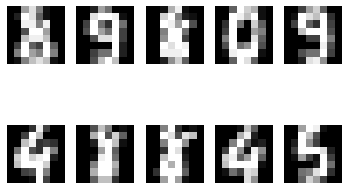

In [51]:
import matplotlib.pyplot as plt
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[-i-1].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

In [52]:
digits.data[-1]

array([ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.,  0.,  2., 16., 14.,  6.,
        1.,  0.,  0.,  0.,  0., 15., 15.,  8., 15.,  0.,  0.,  0.,  0.,
        5., 16., 16., 10.,  0.,  0.,  0.,  0., 12., 15., 15., 12.,  0.,
        0.,  0.,  4., 16.,  6.,  4., 16.,  6.,  0.,  0.,  8., 16., 10.,
        8., 16.,  8.,  0.,  0.,  1.,  8., 12., 14., 12.,  1.,  0.])

## Splitting Data

validation, test를 하기 위해 10%는 validation으로, 20%는 test로 활용한다.

In [53]:
X, y = load_digits(return_X_y=True)

In [54]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

In [55]:
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.125, random_state=42, stratify=y_trainval)

In [56]:
print(X_train.shape, X_val.shape, X_test.shape, sep='\n')

(1257, 64)
(180, 64)
(360, 64)


## Training Model 

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [58]:
# DecisionTreeClassifier


decision_tree = DecisionTreeClassifier(random_state=36)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       0.85      0.94      0.89        18
           2       0.79      0.83      0.81        18
           3       0.71      0.67      0.69        18
           4       0.76      0.89      0.82        18
           5       0.83      0.83      0.83        18
           6       1.00      1.00      1.00        18
           7       0.85      0.94      0.89        18
           8       1.00      0.61      0.76        18
           9       0.76      0.72      0.74        18

    accuracy                           0.84       180
   macro avg       0.85      0.84      0.84       180
weighted avg       0.85      0.84      0.84       180



In [59]:
# RandomForestClassifier


random_forest = RandomForestClassifier(random_state=36)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        18
           4       1.00      0.94      0.97        18
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00        18
           7       0.95      1.00      0.97        18
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00        18

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180



In [60]:
# SupportVectorClassifier


svm_model = svm.SVC(random_state=36)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        18
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00        18

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [71]:
# Stochastic Gradient Descent
# 일반적인 머신러닝 모델에 SGD 기법을 사용합니다.


sgd_model = SGDClassifier(loss='modified_huber', random_state=36)
sgd_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        18
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00        18

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [72]:
# Logistic Regression


log_model = LogisticRegression(solver='liblinear',random_state=36)  # 작은 dataset에는 liblnear 메소드가 낫다고 한다
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.94      0.89      0.91        18
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        18
           4       0.89      0.94      0.92        18
           5       1.00      1.00      1.00        18
           6       0.95      1.00      0.97        18
           7       1.00      1.00      1.00        18
           8       1.00      0.94      0.97        18
           9       0.94      0.94      0.94        18

    accuracy                           0.97       180
   macro avg       0.97      0.97      0.97       180
weighted avg       0.97      0.97      0.97       180



## Model Test

### validation set 기준으로는, sgd_model, svm_model, random_forest의 성능이 매우 좋았다. test_set에서는 잘 작동하는지 확인해봐야 한다.

In [73]:
# SGD 성능평가 (Test Set)
y_pred = sgd_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.91      0.81      0.85        36
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       1.00      1.00      1.00        36
           5       0.90      1.00      0.95        37
           6       0.97      0.97      0.97        36
           7       0.97      1.00      0.99        36
           8       0.90      0.80      0.85        35
           9       0.89      0.94      0.92        36

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



In [64]:
# SVM 성능평가(Test Set)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       0.97      1.00      0.99        36
           8       1.00      0.94      0.97        35
           9       1.00      0.97      0.99        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [65]:
# RF 성능평가
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.92      1.00      0.96        36
           2       1.00      0.97      0.99        35
           3       0.97      0.97      0.97        37
           4       0.95      1.00      0.97        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.92      1.00      0.96        36
           8       0.97      0.86      0.91        35
           9       0.97      0.92      0.94        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



### validation에 대해 성능이 좋지 못했던 모델도 평가해 보자

In [66]:
# DT 성능평가
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        36
           1       0.76      0.69      0.72        36
           2       0.70      0.80      0.75        35
           3       0.82      0.84      0.83        37
           4       0.83      0.83      0.83        36
           5       0.94      0.92      0.93        37
           6       0.87      0.92      0.89        36
           7       0.80      0.89      0.84        36
           8       0.73      0.63      0.68        35
           9       0.82      0.75      0.78        36

    accuracy                           0.82       360
   macro avg       0.82      0.82      0.82       360
weighted avg       0.82      0.82      0.82       360



In [67]:
# Logistic Regression성능평가
y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.89      0.89      0.89        36
           2       1.00      0.97      0.99        35
           3       0.97      1.00      0.99        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.97      0.97      0.97        36
           8       0.86      0.91      0.89        35
           9       1.00      0.94      0.97        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



# Model 탐색

In [82]:
# 분기 표시
from sklearn.tree import export_text
r = export_text(decision_tree, feature_names=digits['feature_names'])
print(r)

|--- pixel_4_4 <= 0.50
|   |--- pixel_3_4 <= 2.50
|   |   |--- pixel_2_5 <= 0.50
|   |   |   |--- pixel_7_5 <= 0.50
|   |   |   |   |--- class: 5
|   |   |   |--- pixel_7_5 >  0.50
|   |   |   |   |--- pixel_0_3 <= 3.50
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- pixel_0_3 >  3.50
|   |   |   |   |   |--- pixel_6_2 <= 14.00
|   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |--- pixel_6_2 >  14.00
|   |   |   |   |   |   |--- pixel_4_3 <= 6.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- pixel_4_3 >  6.00
|   |   |   |   |   |   |   |--- class: 2
|   |   |--- pixel_2_5 >  0.50
|   |   |   |--- class: 0
|   |--- pixel_3_4 >  2.50
|   |   |--- pixel_2_5 <= 6.50
|   |   |   |--- pixel_0_4 <= 8.00
|   |   |   |   |--- pixel_6_3 <= 9.50
|   |   |   |   |   |--- class: 9
|   |   |   |   |--- pixel_6_3 >  9.50
|   |   |   |   |   |--- pixel_7_2 <= 6.00
|   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |--- pixel_7_2 >  6.00
|   |   |   |   |

* 랜덤 포레스트의 경우, 전체 feature에서 정보 이득이 가장 높은 분기를 택하는 것이 아닌, 임의로 정해진 feature의 부분집합 내에서 최적인 분기가 일어나게 된다. 이때, 부분집합의 최대 원소 개수는 정할 수 있지만. 각 트리가 어떤 feature를 선택하여 그것을 기반으로 분기할지는 정할 수 없다


## 분석

* Precision: FP가 작을수록 큰 값이 나온다. 즉, 실제로 음성인데 양성으로 예측하는 경우가 적을수록 크다.
* Recall: FN이 작을수록 큰 값이 나온다. 즉, 실제로 양성인데 음성으로 예측하는 경우가 적을수록 크다.

손글씨의 경우, Recall과 Precision 중 하나의 metric을 고르기 힘들다. 이경우 F-score를 사용하자.

# 결론

SVM 기법이 가장 일반화 성능이 좋다.